### Sample program for calculating accuracy measures and plotting ROC / PR curve

#### Import libraries  

In [16]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, matthews_corrcoef

#### Parameters  

In [17]:
csv_in = 'class_pre2.csv'

#### CSV file  

In [18]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   100 non-null    int64  
 1   A       100 non-null    float64
 2   B       100 non-null    float64
 3   C       100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB
None


,label,A,B,C
0,1,0.967236,0.727885,0.698040
1,0,0.418231,0.129677,0.497822
2,0,0.370626,0.075308,0.434023
3,1,0.567236,0.620885,0.849366
4,0,0.400454,0.439406,0.460549


#### Confusing matrix (混同行列) and measurements for prediction accuracy for each method  
+ Matthews: https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
+ <img src="./files/pre-recall.png">
+ <img src="./files/formulas.png">

In [19]:
print('A')
print('precision:', precision_score(df['label'], df['A']>=0.6))
print('recall:', recall_score(df['label'], df['A']>=0.6))
print('accuracy(Q2):', accuracy_score(df['label'], df['A']>=0.6))
print('f1:', f1_score(df['label'], df['A']>=0.6))
print('matthews:', matthews_corrcoef(df['label'], df['A']>=0.6))
predA = df['A'].map(lambda x: 1 if x >= 0.6 else 0)
ctA = pd.crosstab(df['label'], predA)
print(ctA)
fpA = ctA.loc[0,1]
tpA = ctA.loc[1,1]
fnA = ctA.loc[1,0]
tnA = ctA.loc[0,0]
print('false positive rate:', fpA/(fpA+tnA), fpA, fpA, tnA)
display(ctA)

A
precision: 0.45161290322580644
recall: 0.5833333333333334
accuracy(Q2): 0.73
f1: 0.509090909090909
matthews: 0.3321131181045284
A       0   1
label        
0      59  17
1      10  14
false positive rate: 0.2236842105263158 17 17 59


A,0,1
label,,
0,59,17
1,10,14


In [20]:
print('B')
print('precision:', precision_score(df['label'], df['B']>=0.6))
print('recall:', recall_score(df['label'], df['B']>=0.6))
print('accuracy(Q2):', accuracy_score(df['label'], df['B']>=0.6))
print('f1:', f1_score(df['label'], df['B']>=0.6))
print('matthews:', matthews_corrcoef(df['label'], df['B']>=0.6))
predB = df['B'].map(lambda x: 1 if x >= 0.6 else 0)
ctB = pd.crosstab(df['label'], predB)
fpB = ctB.loc[0,1]
tnB = ctB.loc[0,0]
print('false positive rate:', fpB/(fpB+tnB))
print('specificity:', tnB/(fpB+tnB))

B
precision: 0.6538461538461539
recall: 0.7083333333333334
accuracy(Q2): 0.84
f1: 0.68
matthews: 0.5743773696831201
false positive rate: 0.11842105263157894
specificity: 0.881578947368421


In [21]:
print('C')
print('precision:', precision_score(df['label'], df['C']>=0.5))
print('recall:', recall_score(df['label'], df['C']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['C']>=0.5))
print('f1:', f1_score(df['label'], df['C']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['C']>=0.5))
predC = df['C'].map(lambda x: 1 if x >= 0.5 else 0)
ctC = pd.crosstab(df['label'], predC)
fpC = ctC.loc[0,1]
tnC = ctC.loc[0,0]
print('false positive rate:', fpC/(fpC+tnC))

C
precision: 0.5128205128205128
recall: 0.8333333333333334
accuracy(Q2): 0.77
f1: 0.6349206349206349
matthews: 0.5107777726419588
false positive rate: 0.25


In [22]:
plt.plot(fprA, tprA, label='A')
plt.plot(fprB, tprB, label='B')
plt.plot(fprC, tprC, label='C')
plt.plot([0,1],[0,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

NameError: name 'fprA' is not defined

#### PR curve and its AUC for each method  

In [ ]:
y_true = df['label']
y_scoreA = df['A']
precisionA, recallA, thresholdsA = precision_recall_curve(y_true, y_scoreA)
print('PR-AUC(A):', auc(recallA, precisionA))
y_scoreB = df['B']
precisionB, recallB, thresholdsB = precision_recall_curve(y_true, y_scoreB)
print('PR-AUC(B):', auc(recallB, precisionB))
y_scoreC = df['C']
precisionC, recallC, thresholdsC = precision_recall_curve(y_true, y_scoreC)
print('PR-AUC(C):', auc(recallC, precisionC))

PR-AUC(A): 0.4088131094661411
PR-AUC(B): 0.6489467735367046
PR-AUC(C): 0.6348901148476905


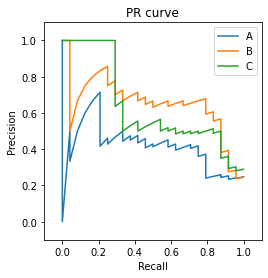

In [ ]:
plt.plot(recallA, precisionA, label='A')
plt.plot(recallB, precisionB, label='B')
plt.plot(recallC, precisionC, label='C')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

#### (Accuracy around high score predictions to see the meaning of PR curves)  
accuracy: B > A > C (this corresponds to PR-AUC)  

In [ ]:
display(df[['label','A']].sort_values(by='A', ascending=False).head())
display(df[['label','B']].sort_values(by='B', ascending=False).head())
display(df[['label','C']].sort_values(by='C', ascending=False).head())

,label,A
77,0,0.998814
16,1,0.994271
30,0,0.993428
89,1,0.974442
94,1,0.973028


,label,B
89,1,0.988786
90,0,0.986668
29,1,0.965966
69,1,0.965702
94,1,0.954733


,label,C
75,1,0.984956
94,1,0.981697
44,1,0.977844
34,1,0.975034
67,1,0.938435
